## <center> Email Spam Classifier </center>

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## Data

In [2]:
df=pd.DataFrame(pd.read_csv(r"E:\DEP\Spam\spam.csv"))

In [3]:
df.sample(5)

Category                                            Message
513       ham                            Lol ok your forgiven :)
4868      ham            Okey dokey swashbuckling stuff what oh.
4069     spam  TBS/PERSOLVO. been chasing us since Sept for£3...
1981      ham                             Sorry, I'll call later
131       ham                                          I'm home.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

In [6]:
df.describe()

Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30

In [7]:
df.duplicated().sum()

415

In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

## <center>Visualization </center>

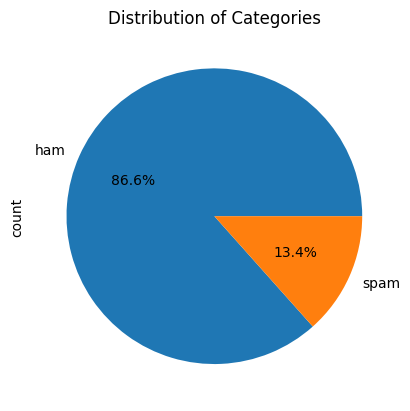

In [10]:
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

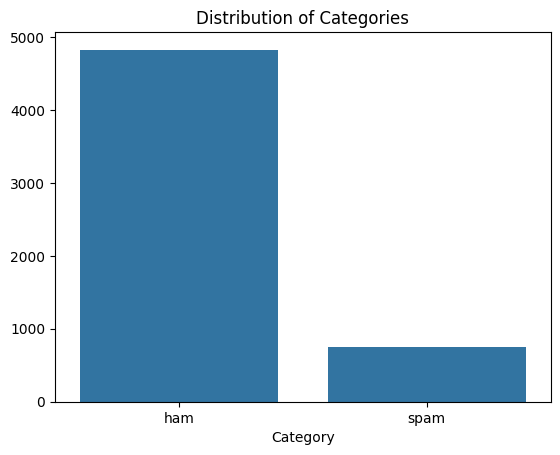

In [11]:
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Distribution of Categories')
plt.show()

## <center> Feature Engineering </center>

In [12]:
df['Category'] = df['Category'].fillna('unknown').map({'ham': 0, 'spam': 1})
df

Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0               Will ü b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [13]:
def tolower(txt):
    return txt.lower()
stop_words = set(stopwords.words('english'))
df['Message']=df['Message'].apply(tolower)
df['Message']=df['Message'].apply(word_tokenize)
df['Message'] = df['Message'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df

Category                                            Message
0            0  [go, jurong, point, ,, crazy, .., available, b...
1            0           [ok, lar, ..., joking, wif, u, oni, ...]
2            1  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3            0  [u, dun, say, early, hor, ..., u, c, already, ...
4            0  [nah, n't, think, goes, usf, ,, lives, around,...
...        ...                                                ...
5567         1  [2nd, time, tried, 2, contact, u., u, £750, po...
5568         0              [ü, b, going, esplanade, fr, home, ?]
5569         0         [pity, ,, *, mood, ., ..., suggestions, ?]
5570         0  [guy, bitching, acted, like, 'd, interested, b...
5571         0                              [rofl, ., true, name]

[5572 rows x 2 columns]

## Visualization of words

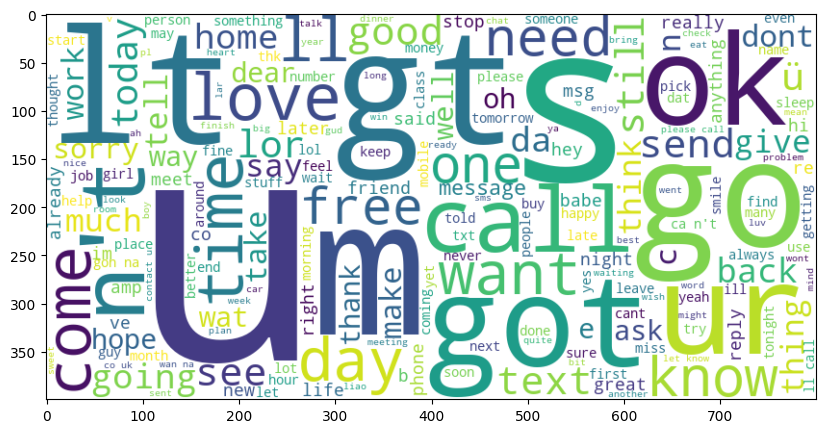

In [14]:
from wordcloud import WordCloud
df['Message'] = df['Message'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
text="".join(df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2,random_state=42)

## Feature Extraction

In [16]:
v=TfidfVectorizer()

In [17]:
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)

## <center> Machine Learning <center>

In [18]:
d = {"Decision Tree Classifier": DecisionTreeClassifier(),
     "Random Forest Classifier": RandomForestClassifier(),
     "Logistic Regression": LogisticRegression(),
     "GradientBoosting Classifier": GradientBoostingClassifier(),
     "SVC": SVC(),
     "Multinomial NB": MultinomialNB()}
m_name=[]
acc_score=[]
for model_name, model in d.items():
    model.fit(X_train_v, y_train)
    pred = model.predict(X_test_v)
    m_name.append(model_name)
    acc_score.append(accuracy_score(y_test, pred)*100)


## <center> Results </center>

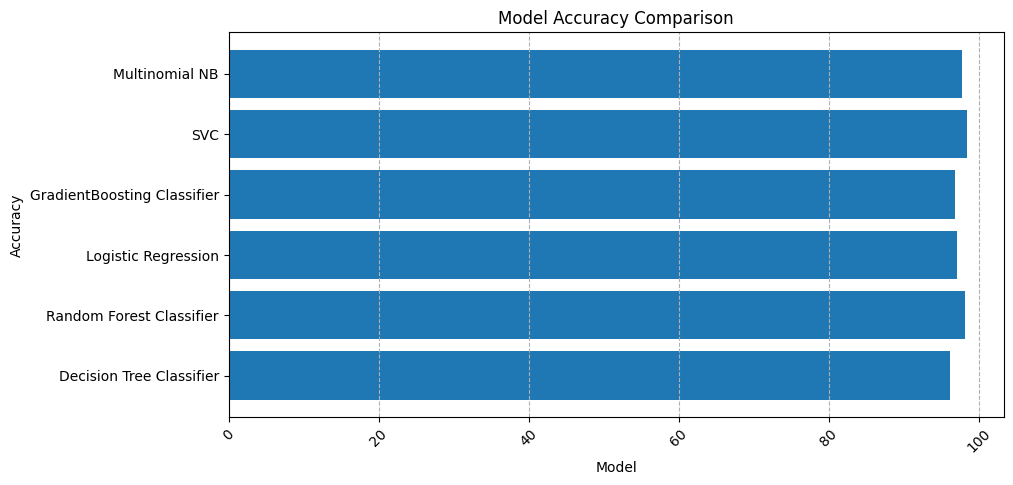

In [19]:
plt.figure(figsize=(10, 5))
plt.barh(m_name, acc_score)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.show()

In [20]:
results = dict(zip(m_name, acc_score))
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")

Decision Tree Classifier: 96.23
Random Forest Classifier: 98.12
Logistic Regression: 97.13
GradientBoosting Classifier: 96.86
SVC: 98.39
Multinomial NB: 97.76


## Key Observations:

- SVC and Random Forest Classifier appear to be the top-performing models based on accuracy, both achieving over 98% accuracy.
- Logistic Regression and Multinomial NB also perform well, with accuracies above 96%.
- Decision Tree Classifier and GradientBoosting Classifier show slightly lower accuracies compared to the other models